# USA Housing Price Analysis with Linear Regression 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Load prepared dataset**

In [7]:
df = pd.read_csv('USA_Housing.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


### Data Exploration  

In [9]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [11]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [32]:
plt.rcParams["patch.force_edgecolor"] = True

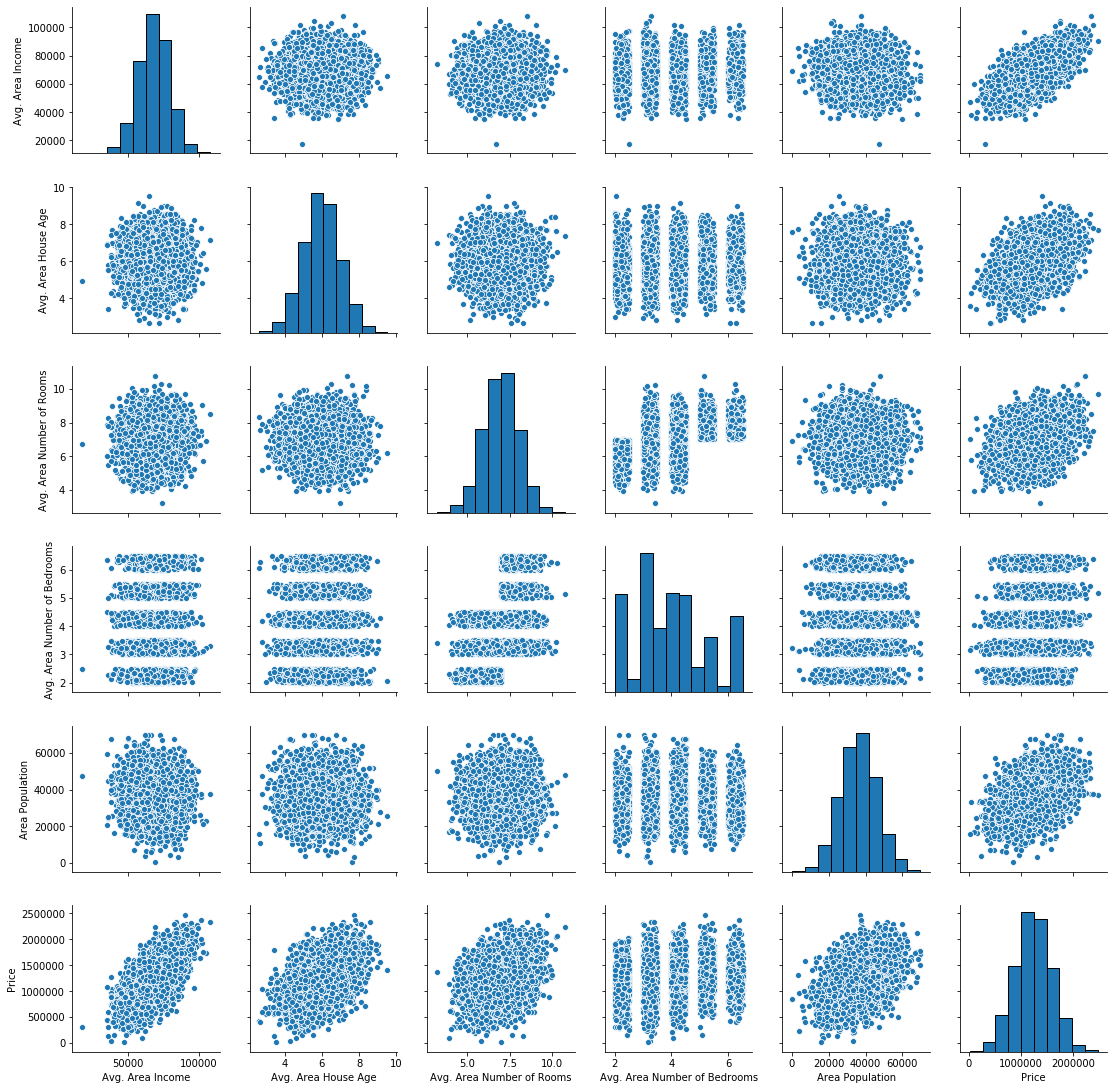

In [34]:
sns.pairplot(df, kind='scatter')

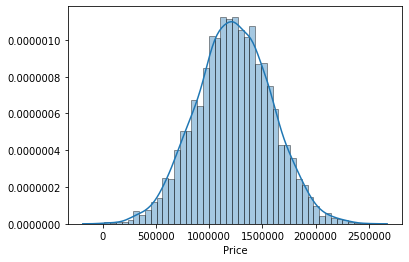

In [33]:
sns.distplot(df['Price'])

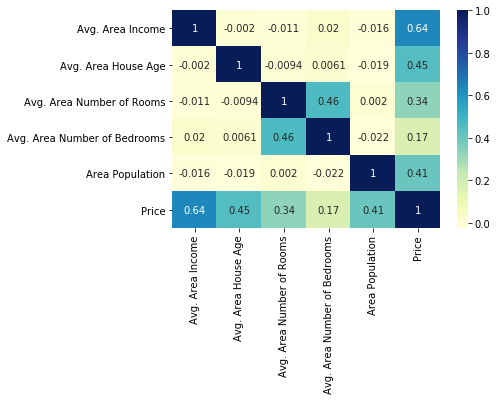

In [25]:
sns.heatmap(df.corr(),cmap='YlGnBu', annot=True )

### Model selection and training 

In [35]:
from sklearn.model_selection import train_test_split

In [54]:
x = df.iloc[:,:-2]
y = df.iloc[:,-2]

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
lreg = LinearRegression().fit(x_train,y_train)

In [62]:
lreg.intercept_

-2621927.897751408

In [64]:
pd.DataFrame(lreg.coef_ ,x.columns, columns=['Coefficients'] )

,Coefficients
Avg. Area Income,21.527310
Avg. Area House Age,164825.608277
Avg. Area Number of Rooms,119494.694494
Avg. Area Number of Bedrooms,1653.177466
Area Population,15.215852


#### Interpret for the meaning of the coefficients<br>
**Linear Function** :<br>
Price = 21.5\*Avg.AreaIncome + 164825.6\*Avg.AreaHouseAge + 119494.7\*Avg.AreaNOofRooms + 1653.2\*Avg.AreaNOofBedrooms + 15.2\*AreaPopulation - 2621927.9 
<br>
- If all other features is fixed, a 1 unit increase in **Avg. Area Income** is associated with an increase of \$21.5.
- If all other features is fixed, a 1 unit increase in **Avg. Area House Age** is associated with an increase of \$164825.6.
- If all other features fixed, a 1 unit increase in **Avg. Area Number of Rooms** is associated with an increase of \$119494.7.
- If all other features fixed, a 1 unit increase in **Avg. Area Number of Bedrooms** is associated with an increase of \$1653.2.
- Holding all other features fixed, a 1 unit increase in **Area Population** is associated with an increase of \$15.2.

### Model Prediction and validation

In [65]:
y_pred = lreg.predict(x_test)

In [66]:
y_pred

array([ 913898.5893471 , 1704694.11880928, 1412718.51727274, ...,
        988966.52805118, 1907704.08182248, 1440468.58007155])

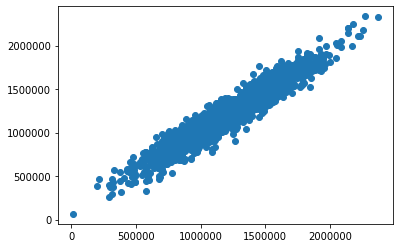

In [67]:
plt.scatter(y_test, y_pred)

**Residual Histogram**<br>
The residuals are normally distributed, that means this linear model is a correct choice for this dataset.

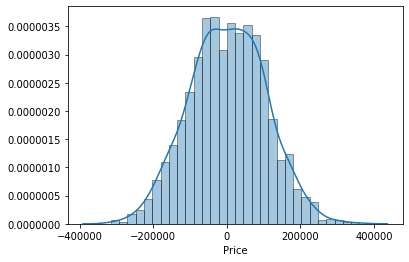

In [71]:
sns.distplot((y_test-y_pred),bins=30)

### The regression evaluation metrics

There are four common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors (average error):

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors (amplify the larger error):

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors (most popular, interpretable in the "y" units):

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

**R-squared** (Goodness of Fit) is the coefficient of how well the values fit compared to the origianl values, the value is from 0 to 1 interpreted as percentages. 

$$1-\frac{\sum(y_i-\hat{y}_i)^2}{\sum(y_i-\bar{y}_i)^2}$$

Where, 
$\hat{y}$ is the predicted value of y, $\bar{y}$ is the mean value of y.<br>

<br>

All of these are **loss functions**, because we want to minimize them.

In [72]:
from sklearn import metrics

**MAE, MSE, RMSE: the lower the better**

In [85]:
metrics.mean_absolute_error(y_test, y_pred)

83537.88860703137

In [82]:
np.mean(abs(y_pred-y_test))

83537.8886070313

In [74]:
metrics.mean_squared_error(y_test, y_pred)

10629042857.66446

In [75]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

103097.24951551549

**Two appoaches to find the R-squared/accuracy of the model**<br> 
Use `.r2_score(y_true, y_predicted)` from metrics module, or use `.score(x,y)` from LinearRegression module.


In [89]:
metrics.r2_score(y_test, y_pred)

0.9137006332621925

In [92]:
lreg.score(x,y)

0.9180029279220435